# Building the CNN

In [2]:
# Import the standard libraries
import numpy as np
import pandas as pd

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "" # CPU만 사용할 경우 설정

In [4]:
# Define the constance

#FOLDER_ = 'Casting CNN'
BATCH_SIZE_ = 16
COLOR_SPECTRUM_ = (1)          # 1 if B&W, 3 if color
IMG_SIZE_ = (300, 300)

In [5]:
# import Keras Modules
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [6]:
# Initialize the CNN

classifier = Sequential()

### Discussion: Image Size
As (i.) we are working with a GPU and (ii.) the image are quite small (300x300 px), we can use Input = Image size.

In [7]:
# Adding the layers
input_shape_ = (300,300) + (COLOR_SPECTRUM_,)
classifier.add(Conv2D(BATCH_SIZE_, (3,3), input_shape=input_shape_, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Add a second layer
classifier.add(Conv2D(BATCH_SIZE_, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
classifier.add(Flatten())

In [8]:
# ANN Layer

# Add a second hidden layer
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dropout(rate=.2))

# Add a second hidden layer
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dropout(rate=.2))

# Add a third hidden layer
classifier.add(Dense(units = 64, activation='relu'))
classifier.add(Dropout(rate=.2))

classifier.add(Dense(units = 1, activation='sigmoid'))

In [9]:
classifier.compile(optimizer= 'adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Importing images

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=25)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
from pathlib import Path

dataset_folder =  Path('D:\\dataset\\Casting\\casting_data\\casting_data')

if dataset_folder.exists():
    print(f'[-------]\nConnect the dataset folder at \n\t{str(dataset_folder)}\n[-------]')
else:
    print(f'[*******]\nConnecting the dataset folder failed \n[*******]')


[-------]
Connect the dataset folder at 
	D:\dataset\Casting\casting_data\casting_data
[-------]


In [12]:
training_files = dataset_folder / 'train/'
test_files = dataset_folder / 'test/'

training_set= train_datagen.flow_from_directory(
        training_files,
        target_size=(300,300),
        batch_size=BATCH_SIZE_,
        class_mode='binary',
        color_mode="grayscale")

test_set = test_datagen.flow_from_directory(
        test_files,
        target_size= (300,300),
        batch_size=BATCH_SIZE_,
        class_mode='binary',
        color_mode="grayscale")

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


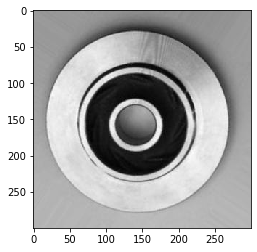

In [13]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
plt.imshow(imread('D:\\dataset\\Casting\\casting_data\\casting_data\\train\\ok_front\\cast_ok_0_1.jpeg'))

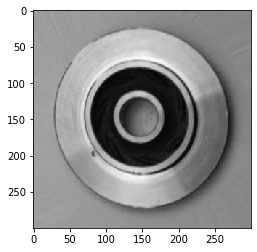

In [14]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
plt.imshow(imread('D:\\dataset\\Casting\\casting_data\\casting_data\\train\\def_front\\cast_def_0_0.jpeg'))

In [15]:
training_size = len(training_set)
test_size = len(test_set)

print(f'{training_size} * {BATCH_SIZE_} = {training_size * BATCH_SIZE_}')
print(f'{test_size} * {BATCH_SIZE_} = {test_size * BATCH_SIZE_}')

415 * 16 = 6640
45 * 16 = 720


In [16]:
# get the number of CPU threads

import multiprocessing
import tensorflow as tf

def set_workers(local = False):
    
    catcha =''
    workers = multiprocessing.cpu_count()
    
    if local:
        workers -= 1 
        catcha = 'locally '
        
    gpus = tf.config.experimental.list_physical_devices('GPU')

    print(f"Working with {workers} CPU threads {catcha}and with {len(gpus)} GPU" )
    
    return workers

workers_ = set_workers()


Working with 12 CPU threads and with 0 GPU


In [17]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=training_size,
        epochs=5,
        validation_data=test_set,
        validation_steps=test_size,
        use_multiprocessing=False,
        workers=workers_)


Epoch 1/5
415/415 [==============================] - 341s 821ms/step - loss: 0.6059 - accuracy: 0.6526 - val_loss: 0.5173 - val_accuracy: 0.8000
Epoch 2/5
415/415 [==============================] - 291s 700ms/step - loss: 0.4623 - accuracy: 0.7693 - val_loss: 0.3999 - val_accuracy: 0.8280
Epoch 3/5
415/415 [==============================] - 302s 728ms/step - loss: 0.4039 - accuracy: 0.8078 - val_loss: 0.8929 - val_accuracy: 0.7664
Epoch 4/5
415/415 [==============================] - 289s 696ms/step - loss: 0.3362 - accuracy: 0.8492 - val_loss: 0.2354 - val_accuracy: 0.9133
Epoch 5/5
415/415 [==============================] - 287s 691ms/step - loss: 0.2920 - accuracy: 0.8746 - val_loss: 0.2278 - val_accuracy: 0.9273


In [18]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 85264)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               10913920  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

## Performance review

### Training performance

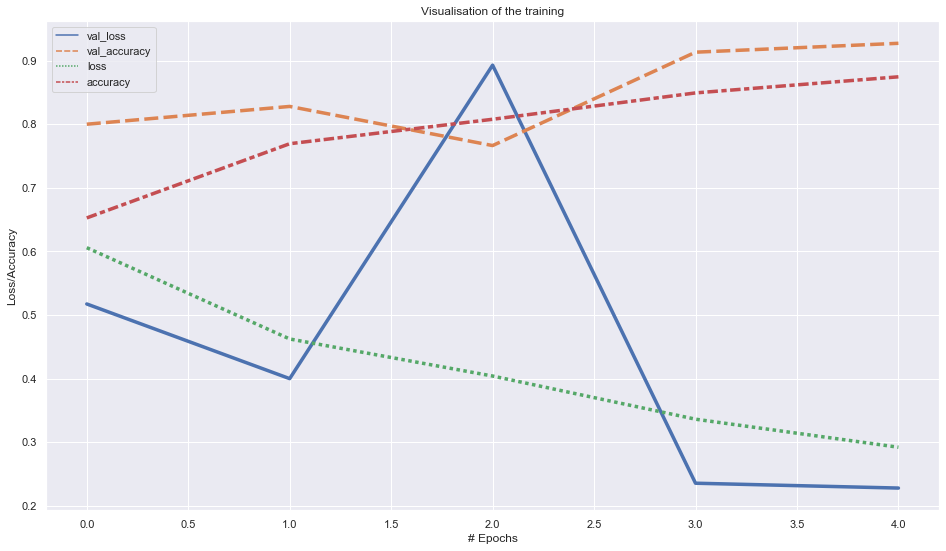

In [19]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,9)
sns.set(style="darkgrid")

data = pd.DataFrame(classifier.history.history)

plt.title('Visualisation of the training')
plt.ylabel('Loss/Accuracy')
plt.xlabel('# Epochs')
sns.lineplot(data=data, linewidth=3.5)

### Confusion Matrix

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

test_set.reset
y_pred = classifier.predict_generator(generator = test_set, 
                                      steps = test_size,
                                      use_multiprocessing=False,
                                        workers=workers_)

y_pred = y_pred >= 0.5

print("[------]\nConfusion Matrix")
print(confusion_matrix(test_set.classes[test_set.index_array], y_pred))
print("[------]")

[------]
Confusion Matrix
[[256 197]
 [167  95]]
[------]


In [21]:
target_names = ['Defective parts', 'Good parts']

print('[------]\nClassification Report')
print(classification_report(test_set.classes[test_set.index_array], y_pred, target_names=target_names))
print("[------]")

[------]
Classification Report
                 precision    recall  f1-score   support

Defective parts       0.61      0.57      0.58       453
     Good parts       0.33      0.36      0.34       262

       accuracy                           0.49       715
      macro avg       0.47      0.46      0.46       715
   weighted avg       0.50      0.49      0.50       715

[------]
